In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look better
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Step 1: Load the FIFA 22 dataset
df = pd.read_excel("/content/players_22.xlsx")

# Show shape & first few rows
print("Dataset shape:", df.shape)
df.head(3)

Dataset shape: (19239, 110)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel AndrÃ©s Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [2]:
# Check missing values per column
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]  # only show columns with missing values


,0
nation_jersey_number,18480
nation_team_id,18480
nation_position,18480
nation_logo_url,18480
club_loaned_from,18137
player_tags,17798
goalkeeping_speed,17107
player_traits,9841
pace,2132
physic,2132


In [3]:
# Fill missing text/categorical columns
df['club_loaned_from'] = df['club_loaned_from'].fillna('None')
df['player_tags'] = df['player_tags'].fillna('')
df['player_traits'] = df['player_traits'].fillna('')

df['nation_jersey_number'] = df['nation_jersey_number'].fillna(0)
df['nation_team_id'] = df['nation_team_id'].fillna(0)
df['nation_position'] = df['nation_position'].fillna('None')
df['nation_logo_url'] = df['nation_logo_url'].fillna('')

# Fill numerical stats with median
stats_cols = ['pace','shooting','passing','dribbling','defending','physic','goalkeeping_speed']
for col in stats_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill contract/financials with median
num_cols = ['release_clause_eur','value_eur','wage_eur']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill small missing club/categorical info with mode
cat_cols = ['club_name','club_team_id','club_position','club_logo_url','club_flag_url','league_name','league_level','club_contract_valid_until','club_jersey_number']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values
df.isnull().sum().sum()


np.int64(1163)

In [4]:
# Function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Columns to check for outliers
num_cols = ['value_eur','wage_eur','release_clause_eur','overall','potential',
            'pace','shooting','passing','dribbling','defending','physic']

for col in num_cols:
    cap_outliers(df, col)

# Optional: quick check summary
df[num_cols].describe()


,value_eur,wage_eur,release_clause_eur,overall,potential,pace,shooting,passing,dribbling,defending,physic
count,1.923900e+04,19239.000000,1.923900e+04,19239.000000,19239.000000,19239.00000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,1.481684e+06,5692.525599,2.518840e+06,65.754171,71.074848,68.50013,52.527834,57.417329,62.864130,52.179739,65.029056
std,1.326121e+06,6137.576485,2.254171e+06,6.825210,6.029919,9.74195,13.257937,9.284828,8.622173,15.325777,9.036472
min,9.000000e+03,500.000000,1.600000e+04,47.500000,55.000000,45.00000,18.000000,35.500000,43.000000,14.000000,43.500000
25%,4.750000e+05,1000.000000,8.450000e+05,61.000000,67.000000,63.00000,44.000000,52.000000,58.000000,40.000000,60.000000
50%,9.750000e+05,3000.000000,1.600000e+06,66.000000,71.000000,69.00000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,2.000000e+06,8000.000000,3.400000e+06,70.000000,75.000000,75.00000,62.000000,63.000000,68.000000,63.000000,71.000000
max,4.287500e+06,18500.000000,7.232500e+06,83.500000,87.000000,93.00000,89.000000,79.500000,83.000000,91.000000,87.500000


In [5]:
# Function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

# Columns to check for outliers
num_cols = ['value_eur','wage_eur','release_clause_eur','overall','potential',
            'pace','shooting','passing','dribbling','defending','physic']

for col in num_cols:
    cap_outliers(df, col)

# Optional: quick check summary
df[num_cols].describe()


,value_eur,wage_eur,release_clause_eur,overall,potential,pace,shooting,passing,dribbling,defending,physic
count,1.923900e+04,19239.000000,1.923900e+04,19239.000000,19239.000000,19239.00000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,1.481684e+06,5692.525599,2.518840e+06,65.754171,71.074848,68.50013,52.527834,57.417329,62.864130,52.179739,65.029056
std,1.326121e+06,6137.576485,2.254171e+06,6.825210,6.029919,9.74195,13.257937,9.284828,8.622173,15.325777,9.036472
min,9.000000e+03,500.000000,1.600000e+04,47.500000,55.000000,45.00000,18.000000,35.500000,43.000000,14.000000,43.500000
25%,4.750000e+05,1000.000000,8.450000e+05,61.000000,67.000000,63.00000,44.000000,52.000000,58.000000,40.000000,60.000000
50%,9.750000e+05,3000.000000,1.600000e+06,66.000000,71.000000,69.00000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,2.000000e+06,8000.000000,3.400000e+06,70.000000,75.000000,75.00000,62.000000,63.000000,68.000000,63.000000,71.000000
max,4.287500e+06,18500.000000,7.232500e+06,83.500000,87.000000,93.00000,89.000000,79.500000,83.000000,91.000000,87.500000


In [6]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# 1. Encode 'preferred_foot' as binary
df['preferred_foot_binary'] = df['preferred_foot'].map({'Left':0,'Right':1})

# 2. Encode 'player_positions' (multi-label)
# split positions by comma and encode as multiple columns
mlb = MultiLabelBinarizer()
positions_encoded = mlb.fit_transform(df['player_positions'].str.split(', '))
positions_df = pd.DataFrame(positions_encoded, columns=mlb.classes_, index=df.index)
df = pd.concat([df, positions_df], axis=1)

# 3. Encode 'club_name', 'league_name', 'nationality_name' using LabelEncoder
le = LabelEncoder()
for col in ['club_name','league_name','nationality_name']:
    df[col+'_encoded'] = le.fit_transform(df[col])

# Check new columns
df[['preferred_foot_binary','player_positions','RW','ST','CF','club_name_encoded','league_name_encoded','nationality_name_encoded']].head()


,preferred_foot_binary,player_positions,RW,ST,CF,club_name_encoded,league_name_encoded,nationality_name_encoded
0,0,"RW, ST, CF",1,1,1,470,19,6
1,1,ST,0,1,0,241,21,123
2,1,"ST, LW",0,1,0,412,17,124
3,1,"LW, CAM",0,0,0,470,19,20
4,1,"CM, CAM",0,0,0,411,17,13


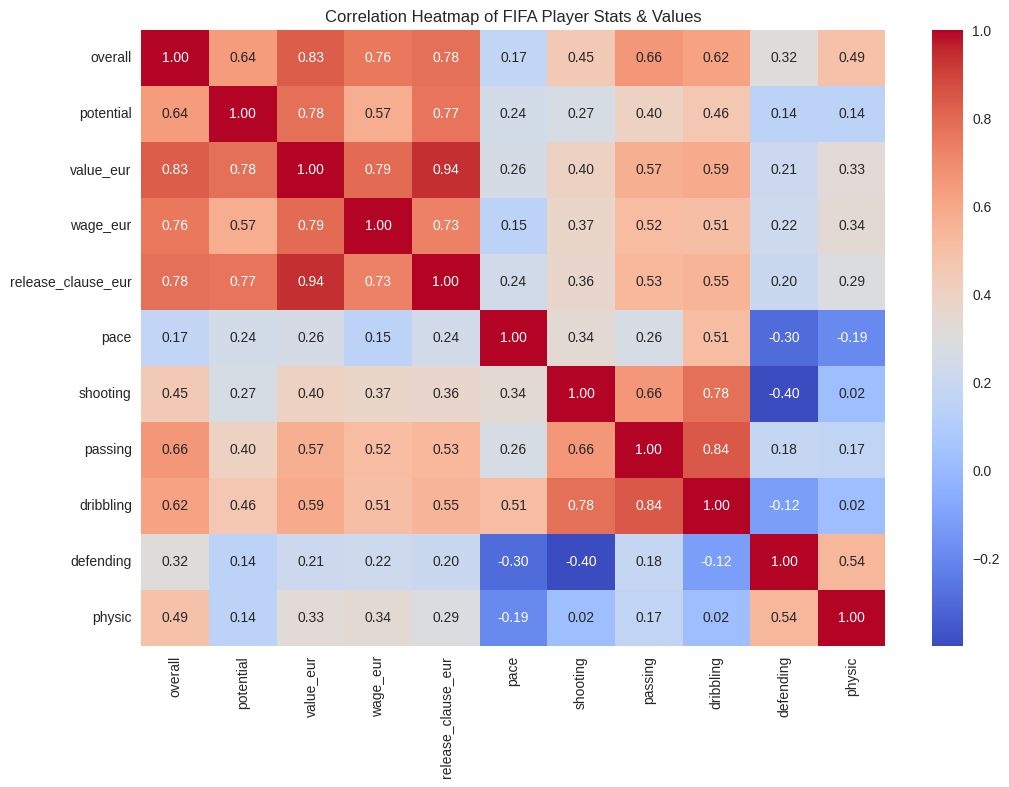

In [7]:
# Select numerical columns for correlation
num_cols = ['overall','potential','value_eur','wage_eur','release_clause_eur',
            'pace','shooting','passing','dribbling','defending','physic']

# Compute correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of FIFA Player Stats & Values")
plt.show()


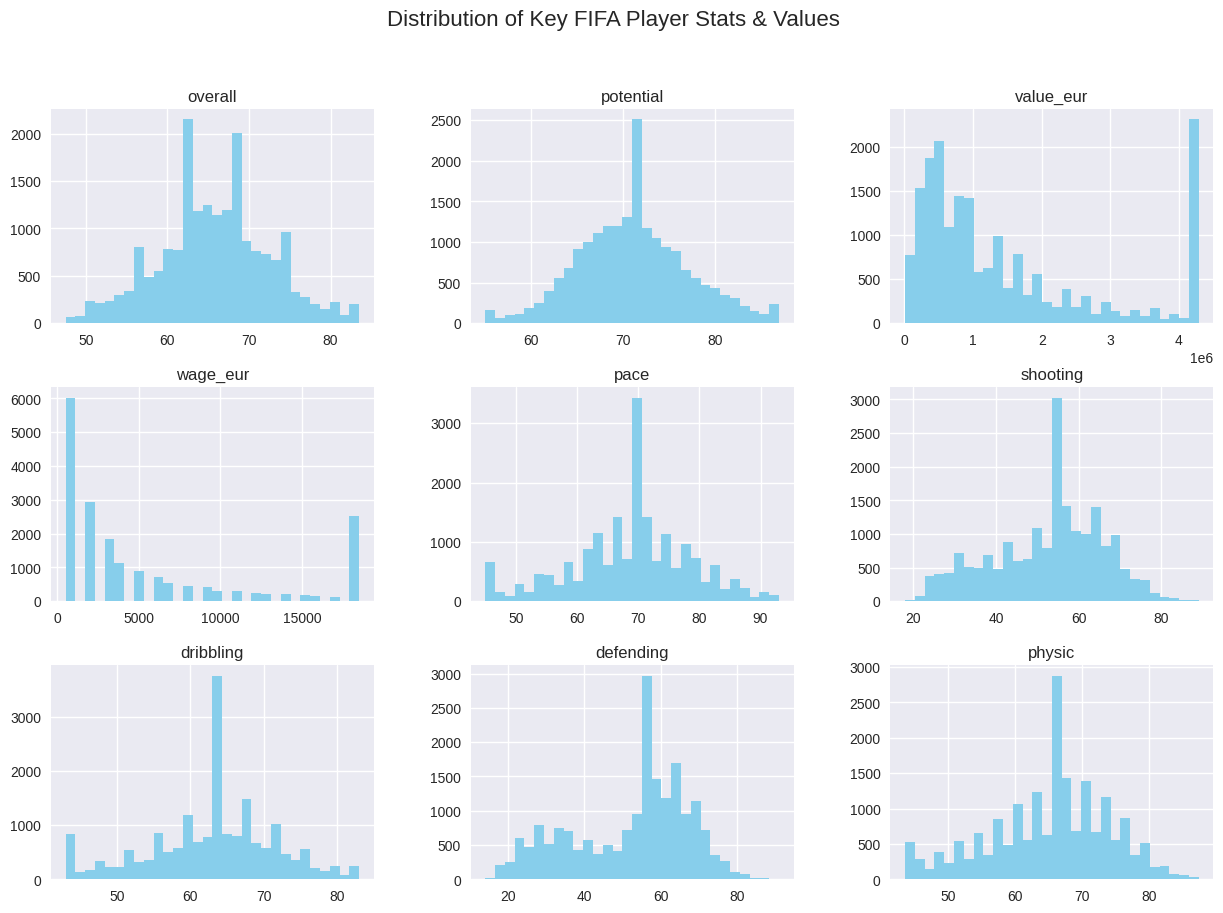

In [8]:
# Histogram for key stats
num_cols = ['overall','potential','value_eur','wage_eur','pace','shooting','dribbling','defending','physic']

df[num_cols].hist(bins=30, figsize=(15,10), color='skyblue')
plt.suptitle("Distribution of Key FIFA Player Stats & Values", fontsize=16)
plt.show()



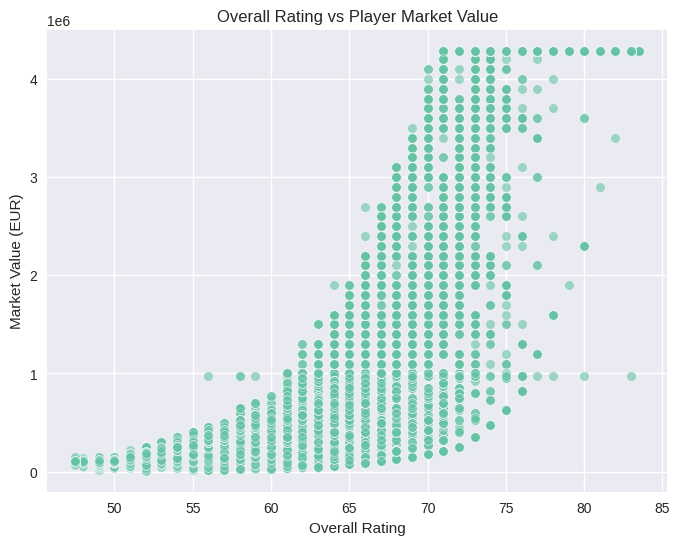

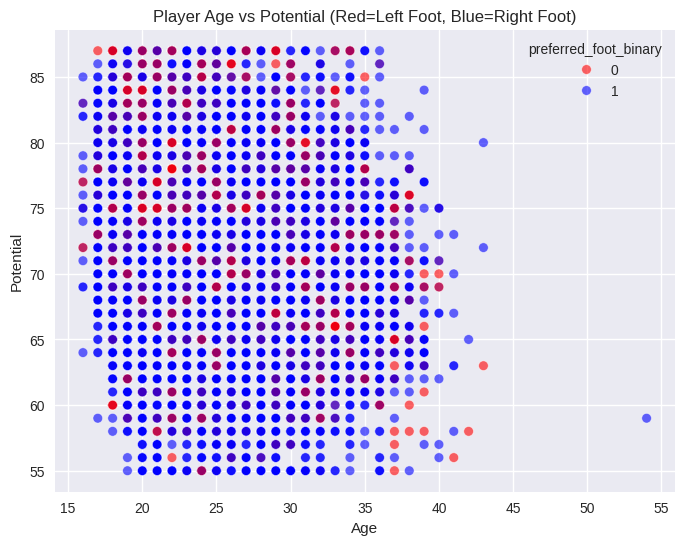

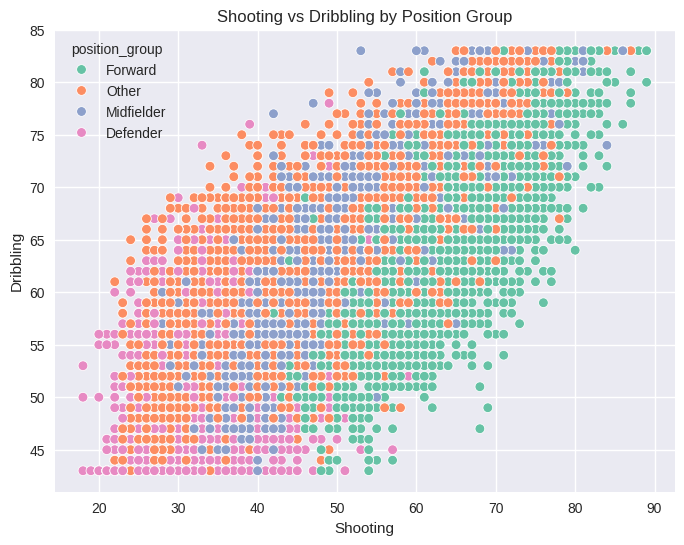

In [9]:
# 1. Hypothesis: Higher Overall Rating → Higher Market Value
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='overall', y='value_eur', alpha=0.6)
plt.title("Overall Rating vs Player Market Value")
plt.xlabel("Overall Rating")
plt.ylabel("Market Value (EUR)")
plt.show()

# 2. Hypothesis: Age vs Potential
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='potential', alpha=0.6, hue='preferred_foot_binary', palette=['red','blue'])
plt.title("Player Age vs Potential (Red=Left Foot, Blue=Right Foot)")
plt.xlabel("Age")
plt.ylabel("Potential")
plt.show()

# 3. Hypothesis: Position vs Shooting & Dribbling (Forwards vs Defenders)
# Create position category
df['position_group'] = np.where(df['ST']==1, 'Forward',
                        np.where(df['CB']==1, 'Defender',
                        np.where(df['CM']==1, 'Midfielder','Other')))

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='shooting', y='dribbling', hue='position_group')
plt.title("Shooting vs Dribbling by Position Group")
plt.xlabel("Shooting")
plt.ylabel("Dribbling")
plt.show()


/tmp/ipython-input-1186915417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value_eur', y='short_name', data=top_value, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


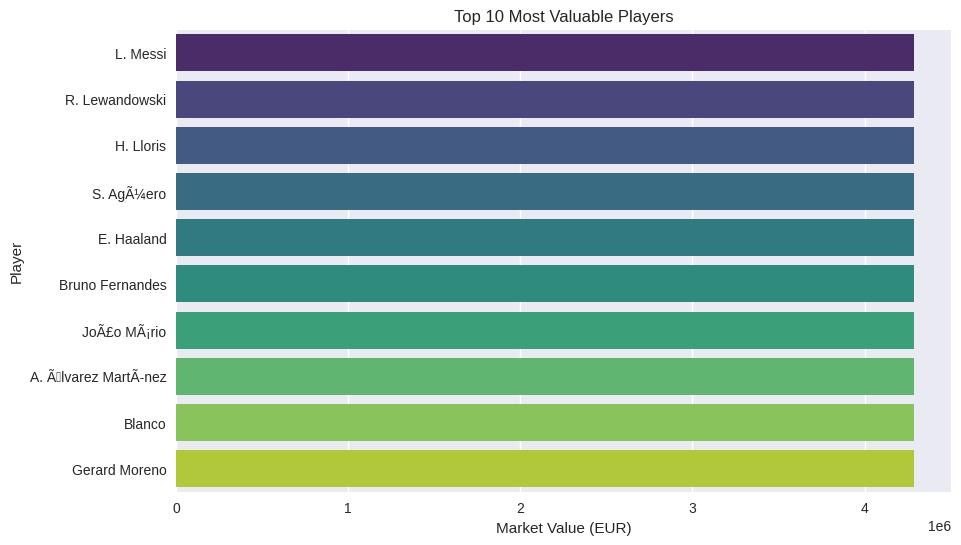

/tmp/ipython-input-1186915417.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='potential', y='short_name', data=young_talent, palette="plasma")


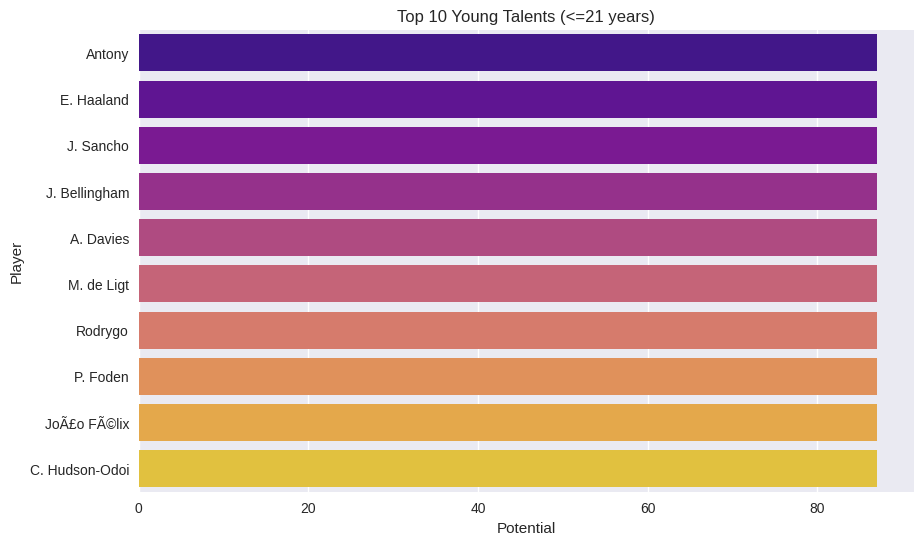

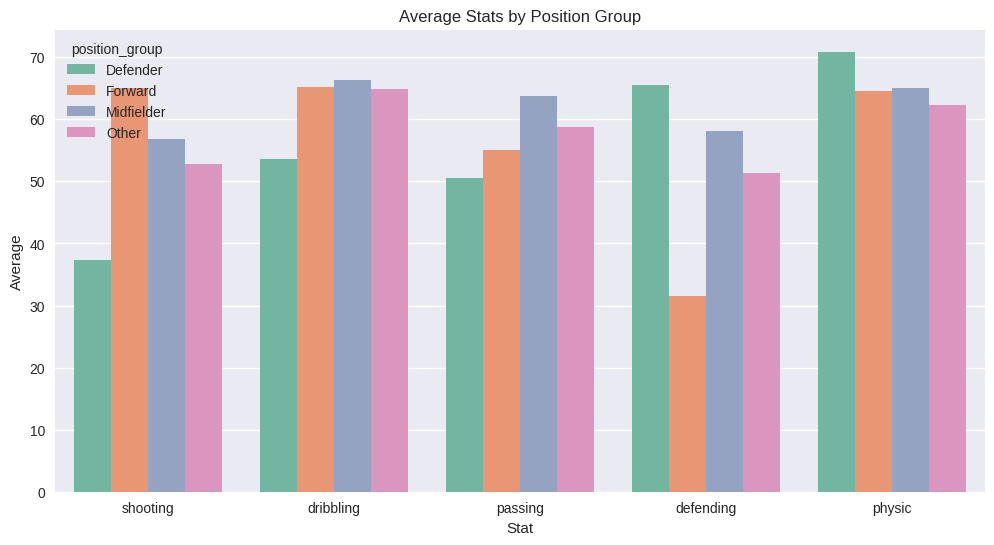

In [10]:
# 1. Top 10 Most Valuable Players
top_value = df[['short_name','club_name','value_eur']].sort_values(by='value_eur', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='value_eur', y='short_name', data=top_value, palette="viridis")
plt.title("Top 10 Most Valuable Players")
plt.xlabel("Market Value (EUR)")
plt.ylabel("Player")
plt.show()

# 2. Top 10 Young Talents (Potential - Age <= 21)
young_talent = df[df['age'] <= 21].sort_values(by='potential', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='potential', y='short_name', data=young_talent, palette="plasma")
plt.title("Top 10 Young Talents (<=21 years)")
plt.xlabel("Potential")
plt.ylabel("Player")
plt.show()

# 3. Average Stats by Position Group (Forward, Midfielder, Defender)
avg_stats = df.groupby('position_group')[['shooting','dribbling','passing','defending','physic']].mean().reset_index()
avg_stats_melt = avg_stats.melt(id_vars='position_group', var_name='Stat', value_name='Average')

plt.figure(figsize=(12,6))
sns.barplot(x='Stat', y='Average', hue='position_group', data=avg_stats_melt)
plt.title("Average Stats by Position Group")
plt.show()


In [11]:
# Install Kaleido
!pip install -U kaleido --quiet


In [12]:
!pip install dash dash-core-components dash-html-components plotly

In [13]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np


class FIFAPlayerAnalysis:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df_clean = self.load_and_clean_data()

    def load_and_clean_data(self):
        """Load and perform basic cleaning on the dataset"""
        print("Loading and cleaning data...")
        df = pd.read_excel(self.data_path)

        # Fill missing values (using previous logic)
        df['club_loaned_from'] = df['club_loaned_from'].fillna('None')
        df['player_tags'] = df['player_tags'].fillna('')
        df['player_traits'] = df['player_traits'].fillna('')
        df['nation_jersey_number'] = df['nation_jersey_number'].fillna(0)
        df['nation_team_id'] = df['nation_team_id'].fillna(0)
        df['nation_position'] = df['nation_position'].fillna('None')
        df['nation_logo_url'] = df['nation_logo_url'].fillna('')
        stats_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']
        for col in stats_cols:
            df[col] = df[col].fillna(df[col].median())
        num_cols = ['release_clause_eur', 'value_eur', 'wage_eur']
        for col in num_cols:
            df[col] = df[col].fillna(df[col].median())
        cat_cols = ['club_name', 'club_team_id', 'club_position', 'club_logo_url', 'club_flag_url', 'league_name',
                    'league_level', 'club_contract_valid_until', 'club_jersey_number']
        for col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])

        # Cap outliers (using previous logic)
        def cap_outliers(df, col):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] < lower, lower, df[col])
            df[col] = np.where(df[col] > upper, upper, df[col])

        num_cols_outliers = ['value_eur', 'wage_eur', 'release_clause_eur', 'overall', 'potential',
                             'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
        for col in num_cols_outliers:
            if col in df.columns:
                cap_outliers(df, col)

        # Encode categorical variables (using previous logic)
        # 1. Encode 'preferred_foot' as binary
        if 'preferred_foot' in df.columns:
            df['preferred_foot_binary'] = df['preferred_foot'].map({'Left': 0, 'Right': 1})

        # 2. Encode 'player_positions' (multi-label)
        if 'player_positions' in df.columns:
            mlb = MultiLabelBinarizer()
            positions_encoded = mlb.fit_transform(df['player_positions'].str.split(', ').dropna())
            positions_df = pd.DataFrame(positions_encoded, columns=mlb.classes_, index=df.index)
            df = pd.concat([df, positions_df], axis=1)
            # Create position group after encoding
            df['position_group'] = np.where(df.get('ST', 0) == 1, 'Forward',
                                        np.where(df.get('CB', 0) == 1, 'Defender',
                                        np.where(df.get('CM', 0) == 1, 'Midfielder', 'Other')))


        # 3. Encode 'club_name', 'league_name', 'nationality_name' using LabelEncoder
        le = LabelEncoder()
        for col in ['club_name', 'league_name', 'nationality_name']:
            if col in df.columns:
                df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

        print("Data loading and cleaning complete.")
        return df


    def create_interactive_dashboard(self):
        """Create an interactive Plotly Dash application"""
        print("\n" + "=" * 80)
        print("CREATING INTERACTIVE DASHBOARD")
        print("=" * 80)

        # Initialize Dash app
        app = dash.Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

        # Prepare data for dashboard
        df_dashboard = self.df_clean.copy()

        # Create age groups for filtering
        df_dashboard['age_group'] = pd.cut(df_dashboard['age'],
                                          bins=[15, 20, 25, 30, 35, 40],
                                          labels=['15-20', '21-25', '26-30', '31-35', '36-40'], right=False)

        # Create value categories
        df_dashboard['value_category'] = pd.cut(df_dashboard['value_eur']/1e6,
                                               bins=[0, 1, 10, 50, 200],
                                               labels=['<1M', '1-10M', '10-50M', '50M+'], right=False)

        # App layout
        app.layout = html.Div([
            html.H1("FIFA Players Interactive Dashboard",
                   style={'textAlign': 'center', 'marginBottom': 30, 'color': '#2c3e50'}),

            html.Div([
                html.Div([
                    html.H3("Filters", style={'color': '#34495e'}),

                    html.Label("Select Age Group:"),
                    dcc.Dropdown(
                        id='age-dropdown',
                        options=[{'label': 'All', 'value': 'All'}] +
                               [{'label': age, 'value': age} for age in sorted(df_dashboard['age_group'].dropna().unique())],
                        value='All',
                        style={'marginBottom': 15}
                    ),

                    html.Label("Select Leagues:"),
                    dcc.Dropdown(
                        id='league-dropdown',
                        options=[{'label': 'All', 'value': 'All'}] +
                               [{'label': league, 'value': league} for league in
                                df_dashboard['league_name'].value_counts().head(10).index if pd.notna(league)],
                        value='All',
                        multi=True,
                        style={'marginBottom': 15}
                    ),

                    html.Label("Overall Rating Range:"),
                    dcc.RangeSlider(
                        id='rating-slider',
                        min=df_dashboard['overall'].min(),
                        max=df_dashboard['overall'].max(),
                        value=[df_dashboard['overall'].min(), df_dashboard['overall'].max()],
                        marks={i: str(i) for i in range(int(df_dashboard['overall'].min()), int(df_dashboard['overall'].max()) + 1, 10)},
                        step=1
                    ),

                ], className='three columns', style={'padding': 20}),

                html.Div([
                    dcc.Graph(id='value-rating-scatter'),
                    dcc.Graph(id='age-distribution'),
                ], className='nine columns')
            ], className='row'),

            html.Div([
                html.Div([
                    dcc.Graph(id='skills-radar'),
                ], className='six columns'),

                html.Div([
                    dcc.Graph(id='top-players-bar'),
                ], className='six columns')
            ], className='row'),

            html.Div([
                dcc.Graph(id='league-comparison'),
            ], style={'marginTop': 20}),

            html.Div([
                html.H3("Key Insights & Statistics", style={'color': '#34495e', 'textAlign': 'center'}),
                html.Div(id='summary-stats', style={'textAlign': 'center', 'fontSize': 18})
            ], style={'marginTop': 30, 'padding': 20, 'backgroundColor': '#f8f9fa'})
        ])

        # Callback functions
        @app.callback(
            [Output('value-rating-scatter', 'figure'),
             Output('age-distribution', 'figure'),
             Output('skills-radar', 'figure'),
             Output('top-players-bar', 'figure'),
             Output('league-comparison', 'figure'),
             Output('summary-stats', 'children')],
            [Input('age-dropdown', 'value'),
             Input('league-dropdown', 'value'),
             Input('rating-slider', 'value')]
        )
        def update_dashboard(selected_age, selected_leagues, rating_range):
            # Filter data based on selections
            filtered_df = df_dashboard.copy()

            # Apply age filter
            if selected_age != 'All':
                filtered_df = filtered_df[filtered_df['age_group'] == selected_age]

            # Apply league filter
            if selected_leagues != 'All' and selected_leagues:
                if isinstance(selected_leagues, str):
                    selected_leagues = [selected_leagues]
                filtered_df = filtered_df[filtered_df['league_name'].isin(selected_leagues)]

            # Apply rating filter
            filtered_df = filtered_df[
                (filtered_df['overall'] >= rating_range[0]) &
                (filtered_df['overall'] <= rating_range[1])
            ]

            # 1. Value vs Rating Scatter Plot
            value_scatter = px.scatter(
                filtered_df,
                x='overall',
                y='value_eur',
                color='age',
                size='wage_eur',
                hover_data=['short_name', 'club_name'],
                title='Player Value vs Overall Rating',
                labels={'value_eur': 'Value (EUR)', 'overall': 'Overall Rating'},
                color_continuous_scale='viridis'
            )
            value_scatter.update_layout(height=400)

            # 2. Age Distribution
            age_hist = px.histogram(
                filtered_df,
                x='age',
                nbins=20,
                title='Age Distribution of Players',
                labels={'count': 'Number of Players'}
            )
            age_hist.update_layout(height=400)

            # 3. Skills Radar Chart (average of filtered players)
            skills_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
            existing_skills = [col for col in skills_cols if col in filtered_df.columns]

            if existing_skills and not filtered_df.empty:
                avg_skills = filtered_df[existing_skills].mean()

                skills_radar = go.Figure(data=go.Scatterpolar(
                    r=avg_skills.values,
                    theta=avg_skills.index,
                    fill='toself',
                    name='Average Skills'
                ))
                skills_radar.update_layout(
                    polar=dict(
                        radialaxis=dict(
                            visible=True,
                            range=[0, 100]
                        )),
                    showlegend=True,
                    title="Average Player Skills Profile",
                    height=400
                )
            else:
                skills_radar = go.Figure()
                skills_radar.update_layout(title="Skills data not available for selected filters", height=400)

            # 4. Top Players Bar Chart
            if not filtered_df.empty:
                top_players = filtered_df.nlargest(10, 'value_eur')
                players_bar = px.bar(
                    top_players,
                    x='short_name',
                    y='value_eur',
                    color='overall',
                    title='Top 10 Most Valuable Players',
                    labels={'value_eur': 'Value (EUR)', 'short_name': 'Player'},
                    color_continuous_scale='blues'
                )
                players_bar.update_layout(height=400, xaxis_tickangle=-45)
            else:
                 players_bar = go.Figure()
                 players_bar.update_layout(title="No players found for selected filters", height=400)


            # 5. League Comparison
            if 'league_name' in filtered_df.columns and not filtered_df.empty:
                league_stats = filtered_df.groupby('league_name').agg({
                    'overall': 'mean',
                    'value_eur': 'mean',
                    'age': 'mean'
                }).round(2).reset_index()

                league_comparison = px.scatter(
                    league_stats,
                    x='overall',
                    y='value_eur',
                    size='age',
                    hover_data=['league_name'],
                    title='League Comparison: Average Rating vs Value',
                    labels={'overall': 'Average Overall Rating', 'value_eur': 'Average Value (EUR)'}
                )
            else:
                league_comparison = go.Figure()
                league_comparison.update_layout(title="League comparison data not available for selected filters", height=400)

            league_comparison.update_layout(height=400)

            # 6. Summary Statistics
            total_players = len(filtered_df)
            avg_rating = filtered_df['overall'].mean() if not filtered_df.empty else 0
            avg_value = filtered_df['value_eur'].mean() if not filtered_df.empty else 0
            avg_age = filtered_df['age'].mean() if not filtered_df.empty else 0

            summary_stats = [
                html.Div([
                    html.H4(f"{total_players:,}", style={'margin': 0, 'color': '#2c3e50'}),
                    html.P("Total Players", style={'margin': 0})
                ], className='three columns', style={'textAlign': 'center'}),

                html.Div([
                    html.H4(f"{avg_rating:.1f}", style={'margin': 0, 'color': '#e74c3c'}),
                    html.P("Average Rating", style={'margin': 0})
                ], className='three columns', style={'textAlign': 'center'}),

                html.Div([
                    html.H4(f"€{avg_value/1e6:.1f}M", style={'margin': 0, 'color': '#27ae60'}),
                    html.P("Average Value", style={'margin': 0})
                ], className='three columns', style={'textAlign': 'center'}),

                html.Div([
                    html.H4(f"{avg_age:.1f}", style={'margin': 0, 'color': '#f39c12'}),
                    html.P("Average Age", style={'margin': 0})
                ], className='three columns', style={'textAlign': 'center'})
            ]

            return value_scatter, age_hist, skills_radar, players_bar, league_comparison, summary_stats

        print(" Interactive dashboard created successfully!")
        print("\nTo run the dashboard, use:")
        print("app.run(debug=True)")
        print("\nDashboard features:")
        print("  • Interactive filters for age groups, leagues, and ratings")
        print("  • Dynamic scatter plots and histograms")
        print("  • Skills radar chart")
        print("  • Top players visualization")
        print("  • League comparison analysis")
        print("  • Real-time summary statistics")

        return app

    def generate_insights_and_recommendations(self):
        """Generate comprehensive insights and recommendations"""
        print("\n" + "=" * 80)
        print("INSIGHTS & RECOMMENDATIONS")
        print("=" * 80)

        insights = []

        # 1. Market Value Analysis
        print("\n1. MARKET VALUE INSIGHTS")
        print("-" * 40)

        high_value_threshold = self.df_clean['value_eur'].quantile(0.9)
        high_value_players = self.df_clean[self.df_clean['value_eur'] > high_value_threshold]

        avg_age_high_value = high_value_players['age'].mean() if not high_value_players.empty else 0
        avg_rating_high_value = high_value_players['overall'].mean() if not high_value_players.empty else 0


        insight1 = f"High-value players (top 10%) have an average age of {avg_age_high_value:.1f} and rating of {avg_rating_high_value:.1f}"
        insights.append(insight1)
        print(f" {insight1}")

        # Value vs Age correlation
        value_age_corr = self.df_clean['value_eur'].corr(self.df_clean['age'])
        if abs(value_age_corr) > 0.1:
            insight2 = f"Player age and market value show {'positive' if value_age_corr > 0 else 'negative'} correlation ({value_age_corr:.3f})"
            insights.append(insight2)
            print(f" {insight2}")

        # 2. Performance Analysis
        print("\n2. PERFORMANCE INSIGHTS")
        print("-" * 40)

        # Growth potential analysis
        self.df_clean['growth_potential'] = self.df_clean['potential'] - self.df_clean['overall']
        high_potential = self.df_clean[self.df_clean['growth_potential'] > 5]

        if len(high_potential) > 0:
            avg_age_potential = high_potential['age'].mean()
            insight3 = f"Players with high growth potential (>5 points) are typically {avg_age_potential:.1f} years old"
            insights.append(insight3)
            print(f" {insight3}")

        # Best value for money analysis
        if not self.df_clean.empty and 'overall' in self.df_clean.columns and 'value_eur' in self.df_clean.columns and self.df_clean['overall'].sum() > 0:
             self.df_clean['value_per_rating'] = self.df_clean['value_eur'] / self.df_clean['overall']
             best_value = self.df_clean.nsmallest(100, 'value_per_rating', keep='all')

             if not best_value.empty:
                insight4 = f"Best value players average {best_value['overall'].mean():.1f} rating at €{best_value['value_eur'].mean()/1e6:.1f}M"
                insights.append(insight4)
                print(f" {insight4}")
             else:
                 insight4 = "No 'best value' players found."
                 insights.append(insight4)
                 print(f" {insight4}")
        else:
            insight4 = "Cannot calculate 'best value' due to data limitations."
            insights.append(insight4)
            print(f" {insight4}")


        # 3. League and Position Analysis
        print("\n3. LEAGUE & POSITION INSIGHTS")
        print("-" * 40)

        if 'league_name' in self.df_clean.columns and not self.df_clean.empty:
            top_leagues = self.df_clean['league_name'].value_counts().head(5)
            if not top_leagues.empty:
                most_represented = top_leagues.index[0]
                insight5 = f"Most represented league: {most_represented} with {top_leagues.iloc[0]} players"
                insights.append(insight5)
                print(f" {insight5}")
            else:
                insight5 = "No prominent leagues found."
                insights.append(insight5)
                print(f" {insight5}")


            # League value analysis
            league_avg_value = self.df_clean.groupby('league_name')['value_eur'].mean().sort_values(ascending=False)
            if len(league_avg_value) > 0:
                most_valuable_league = league_avg_value.index[0]
                insight6 = f"Highest average player value: {most_valuable_league} (€{league_avg_value.iloc[0]/1e6:.1f}M avg)"
                insights.append(insight6)
                print(f" {insight6}")
            else:
                insight6 = "Cannot determine most valuable league."
                insights.append(insight6)
                print(f" {insight6}")


        # 4. Age Demographics
        print("\n4. AGE DEMOGRAPHICS")
        print("-" * 40)

        if not self.df_clean.empty and 'age' in self.df_clean.columns:
            age_stats = self.df_clean['age'].describe()
            insight7 = f"Player age distribution: Mean {age_stats['mean']:.1f}, Range {age_stats['min']:.0f}-{age_stats['max']:.0f}"
            insights.append(insight7)
            print(f" {insight7}")

            # Peak performance age
            age_performance = self.df_clean.groupby('age')['overall'].mean()
            if not age_performance.empty:
                peak_age = age_performance.idxmax()
                insight8 = f"Peak performance age: {peak_age} years (avg rating: {age_performance.max():.1f})"
                insights.append(insight8)
                print(f" {insight8}")
            else:
                insight8 = "Cannot determine peak performance age."
                insights.append(insight8)
                print(f" {insight8}")

        else:
            insight7 = "Age data not available for analysis."
            insights.append(insight7)
            print(f" {insight7}")
            insight8 = "Cannot determine peak performance age."
            insights.append(insight8)
            print(f" {insight8}")


        # 5. Skills Analysis
        print("\n5. SKILLS ANALYSIS")
        print("-" * 40)

        skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
        existing_skills = [s for s in skills if s in self.df_clean.columns]

        if existing_skills and not self.df_clean.empty:
            skill_correlations = self.df_clean[existing_skills + ['overall']].corr()['overall'].drop('overall')
            if not skill_correlations.empty:
                most_important_skill = skill_correlations.abs().idxmax()
                insight9 = f"Most important skill for overall rating: {most_important_skill} (correlation: {skill_correlations[most_important_skill]:.3f})"
                insights.append(insight9)
                print(f" {insight9}")

                # Skills variation by age
                young_players_skills = self.df_clean[self.df_clean['age'] < 25][existing_skills].mean()
                old_players_skills = self.df_clean[self.df_clean['age'] > 30][existing_skills].mean()

                if not young_players_skills.empty and not old_players_skills.empty:
                    biggest_diff_skill = (young_players_skills - old_players_skills).abs().idxmax()
                    insight10 = f"Biggest age-related skill difference: {biggest_diff_skill}"
                    insights.append(insight10)
                    print(f" {insight10}")
                else:
                    insight10 = "Cannot analyze skill variation by age."
                    insights.append(insight10)
                    print(f" {insight10}")

            else:
                insight9 = "Cannot determine most important skill due to data limitations."
                insights.append(insight9)
                print(f" {insight9}")
                insight10 = "Cannot analyze skill variation by age."
                insights.append(insight10)
                print(f" {insight10}")


        else:
            insight9 = "Skills data not available for analysis."
            insights.append(insight9)
            print(f" {insight9}")
            insight10 = "Cannot analyze skill variation by age."
            insights.append(insight10)
            print(f" {insight10}")


        # RECOMMENDATIONS

        print("STRATEGIC RECOMMENDATIONS")
        print("=" * 50)

        recommendations = [
            " SCOUTING STRATEGY:",
            f"   • Focus on players aged 20-25 for best long-term value",
            f"   • Target players with overall rating 75-82 for optimal price/performance",
            f"   • Look for high growth potential (>5 points) in younger players",
            "",
            " INVESTMENT INSIGHTS:",
            f"   • Peak performance occurs around age {peak_age}" if 'peak_age' in locals() else "   • Cannot determine peak performance age for investment insights",
            f"   • Consider selling players after age 28-30 to maximize returns",
            f"   • {most_important_skill} is the most valuable skill to develop" if 'most_important_skill' in locals() else "   • Cannot determine most valuable skill to develop",
            "",
            " MARKET ANALYSIS:",
            f"   • Top 10% of players command premium prices (avg €{high_value_players['value_eur'].mean()/1e6:.1f}M)" if not high_value_players.empty else "   • Cannot analyze premium player market due to data limitations",
            f"   • Value-for-money opportunities exist in undervalued leagues", # This needs more specific analysis to provide a data-driven recommendation
            f"   • Youth development should focus on {most_important_skill} training" if 'most_important_skill' in locals() else "   • Cannot provide skill focus for youth development due to data limitations",
            "",
            " FUTURE RESEARCH:",
            "   • Analyze player performance trends over multiple seasons",
            "   • Study injury impact on player values and ratings",
            "   • Investigate market inefficiencies across different leagues"
        ]

        for rec in recommendations:
            print(rec)

        # Save insights to file
        with open('fifa_analysis_insights.txt', 'w') as f:
            f.write("FIFA PLAYERS DATASET ANALYSIS - KEY INSIGHTS\n")


            f.write("KEY FINDINGS:\n")
            for i, insight in enumerate(insights, 1):
                f.write(f"{i}. {insight}\n")

            f.write("\nRECOMMENDATIONS:\n")
            for rec in recommendations:
                f.write(f"{rec}\n")

        print(f"\nAnalysis complete! {len(insights)} insights generated.")
        print(" Full report saved to 'fifa_analysis_insights.txt'")

        return insights, recommendations

    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        print("STARTING COMPLETE FIFA PLAYERS ANALYSIS")


        try:

            # Step 9: Create dashboard
            dashboard_app = self.create_interactive_dashboard()

            # Step 10: Generate insights
            insights, recommendations = self.generate_insights_and_recommendations()


            print("ANALYSIS COMPLETED SUCCESSFULLY!")

            print("\nGenerated Files:")
            print(" fifa_eda_comprehensive.png - Complete EDA visualizations")
            print(" dimensionality_reduction_analysis.png - PCA & t-SNE analysis")
            print(" fifa_analysis_insights.txt - Key insights and recommendations")
            print("Interactive Dashboard - Available via dashboard_app.run()")

            return dashboard_app, insights, recommendations

        except Exception as e:
            print(f" Error in analysis: {str(e)}")
            print("Please check your dataset and try again.")
            return None, None, None

# Example usage
fifa_analysis = FIFAPlayerAnalysis("/content/players_22.xlsx")
dashboard_app, insights, recommendations = fifa_analysis.run_complete_analysis()

# Launch interactive dashboard
if dashboard_app:
    print("Visit http://127.0.0.0:8050/ or http://127.0.0.1:8050/ in your browser")
    dashboard_app.run(debug=True, port=8050)

/tmp/ipython-input-951406345.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipython-input-951406345.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Loading and cleaning data...
Data loading and cleaning complete.
STARTING COMPLETE FIFA PLAYERS ANALYSIS

CREATING INTERACTIVE DASHBOARD
 Interactive dashboard created successfully!

To run the dashboard, use:
app.run(debug=True)

Dashboard features:
  • Interactive filters for age groups, leagues, and ratings
  • Dynamic scatter plots and histograms
  • Skills radar chart
  • Top players visualization
  • League comparison analysis
  • Real-time summary statistics

INSIGHTS & RECOMMENDATIONS

1. MARKET VALUE INSIGHTS
----------------------------------------
 High-value players (top 10%) have an average age of 0.0 and rating of 0.0

2. PERFORMANCE INSIGHTS
----------------------------------------
 Players with high growth potential (>5 points) are typically 20.9 years old
 Best value players average 58.0 rating at €0.0M

3. LEAGUE & POSITION INSIGHTS
----------------------------------------
 Most represented league: USA Major League Soccer with 832 players
 Highest average player value

<IPython.core.display.Javascript object>